# Checking if the roulette wheel is fair
We would expect that the spins would form a uniform distribution. This can be checked by using a chi-squared test.

In [1]:
from roulette import Roulette
import matplotlib.pyplot as plt  # type: ignore
import numpy as np

roulette = Roulette()

In [2]:
nums = [0] * 37
for i in range(3000000):
    num = roulette.spin()
    nums[num] += 1

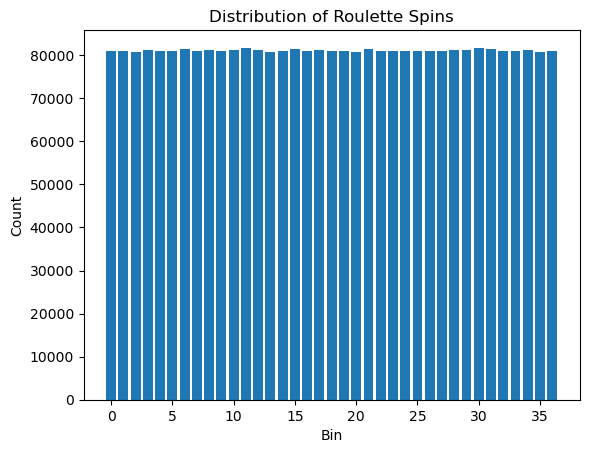

In [3]:
plt.bar(range(37), nums)
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('Distribution of Roulette Spins')
plt.show()

In [4]:
from scipy.stats import chi2_contingency

print("Our hypothesis is that the distribution of spins is uniform.")

total_observed = np.sum(nums)
num_bins = len(nums)
expected_frequency = total_observed / num_bins
expected_frequencies = np.full(num_bins, expected_frequency)

print(f"Expected Frequency: {expected_frequency}")
print(f"Observed Frequencies: {nums}")

chi2_stat, p_value, dof, expected = chi2_contingency([nums, expected_frequencies])

alpha = 0.05
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a uniform distribution.")
else:
    print("Accept the null hypothesis. The data follows a uniform distribution.")


Our hypothesis is that the distribution of spins is uniform.
Expected Frequency: 81081.08108108108
Observed Frequencies: [80990, 81064, 80841, 81204, 80891, 81009, 81399, 81072, 81287, 80969, 81282, 81733, 81092, 80837, 80857, 81536, 81083, 81188, 81058, 80864, 80700, 81337, 80923, 80972, 80999, 80974, 81028, 81014, 81144, 81096, 81581, 81334, 80944, 80907, 81143, 80656, 80992]
Chi2 Stat: 12.028451820033167
P-value: 0.9999413827197413
Accept the null hypothesis. The data follows a uniform distribution.


From this we can conclude that the model for the roulette wheel is fair as our P-value is very high.